## Загрузка данных

In [30]:
import pandas as pd 
import numpy as np 
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split 


In [31]:
df=pd.read_csv('boston.csv')

In [32]:
X=df.copy()
y=X.pop('MEDV')
X.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error,r2_score,mean_absolute_percentage_error,mean_absolute_error

## Проверка зависимости точности от количества строк
Для этого будем разделять тестовую и тренировочную выборки на разные пропорции

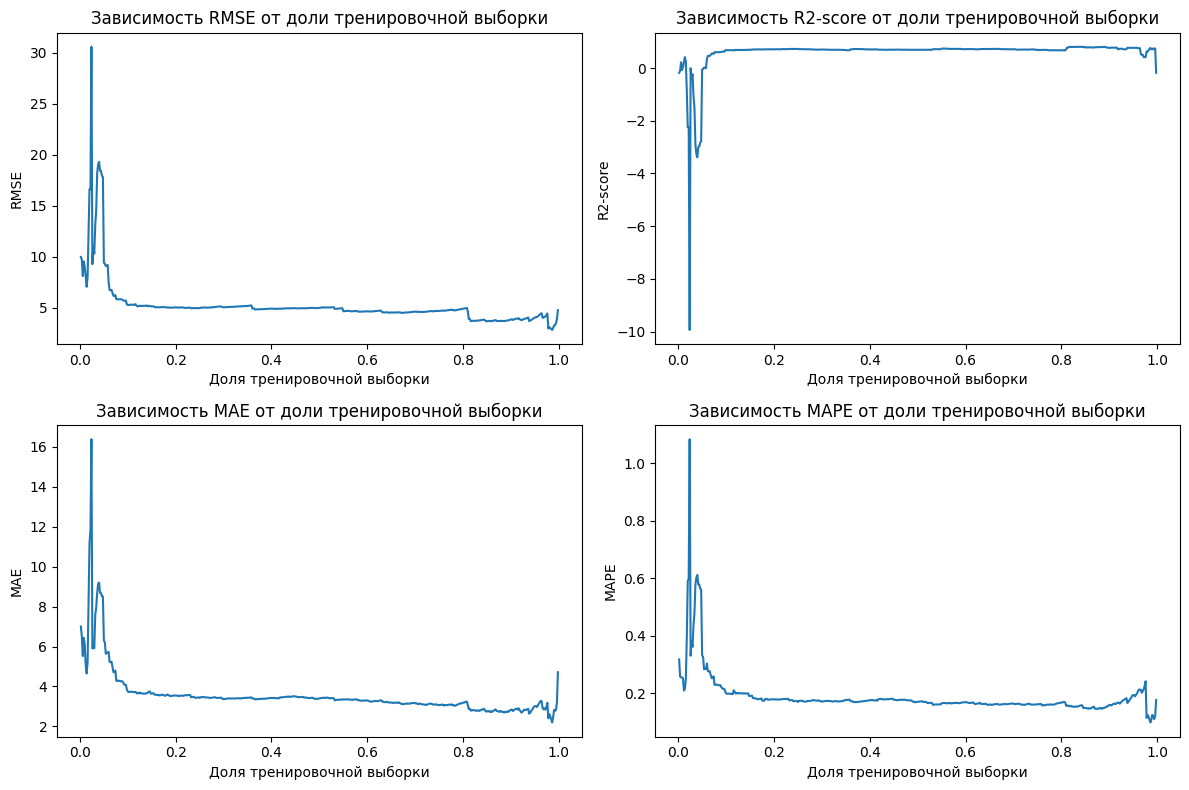

In [34]:
model = LinearRegression()
rmse_arr=np.zeros(499)
r2_arr=np.zeros(499)
mae_arr=np.zeros(499)
mape_arr=np.zeros(499)
x_arr=np.zeros(499)

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

for i in range(499):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-(i+1)/500, random_state=42)

    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)

    rmse_arr[i]=root_mean_squared_error(y_test,y_pred)
    r2_arr[i]=r2_score(y_test,y_pred)
    mae_arr[i]=mean_absolute_error(y_test,y_pred)
    mape_arr[i]=mean_absolute_percentage_error(y_test,y_pred)

    x_arr[i]=(i+1)/500


axs[0,0].plot(x_arr,rmse_arr)
axs[0,1].plot(x_arr,r2_arr)
axs[1,0].plot(x_arr,mae_arr)
axs[1,1].plot(x_arr,mape_arr)
for i in range (4):
    axs[i//2,i%2].set_xlabel('Доля тренировочной выборки')

axs[0,0].set_ylabel('RMSE')
axs[0,1].set_ylabel('R2-score')
axs[1,0].set_ylabel('MAE')
axs[1,1].set_ylabel('MAPE')

axs[0,0].set_title('Зависимость RMSE от доли тренировочной выборки')
axs[0,1].set_title('Зависимость R2-score от доли тренировочной выборки')
axs[1,0].set_title('Зависимость MAE от доли тренировочной выборки')
axs[1,1].set_title('Зависимость MAPE от доли тренировочной выборки')


plt.tight_layout()
plt.show()


Вывод: при малом размере тренировочной выборки результат почти всегда плох. При слишком малой доли тестовой выборки результат ведет себя непредсказуемо (можно посмотреть меняя random_state). Поэтому увеличение количества строк помогает, но в разумных пределах. Тренировочным строкам следует составлять 0.6-0.9 процентов от всех данных

## Проверка зависимости точности от количества столбцов

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model=LinearRegression()
model.fit(X_train,y_train)
model.coef_

array([-1.13055924e-01,  3.01104641e-02,  4.03807204e-02,  2.78443820e+00,
       -1.72026334e+01,  4.43883520e+00, -6.29636221e-03, -1.44786537e+00,
        2.62429736e-01, -1.06467863e-02, -9.15456240e-01,  1.23513347e-02,
       -5.08571424e-01])

Будем постепенно добавлять столбцы от наибольшего значения коэффициента линейной регрессии до наименьшего

In [36]:
column_importances={}
column_list=list(X_train.columns)
for i in range(len(model.coef_)):
    column_importances[column_list[i]]=abs(model.coef_[i])

sorted_importances_list = sorted(column_importances.items(), key=lambda item: item[1], reverse=True)
sorted_importances = dict(sorted_importances_list)
ordered_columns=list(sorted_importances)
ordered_columns

['NOX',
 'RM',
 'CHAS',
 'DIS',
 'PTRATIO',
 'LSTAT',
 'RAD',
 'CRIM',
 'INDUS',
 'ZN',
 'B',
 'TAX',
 'AGE']

#### Отрисовка данных

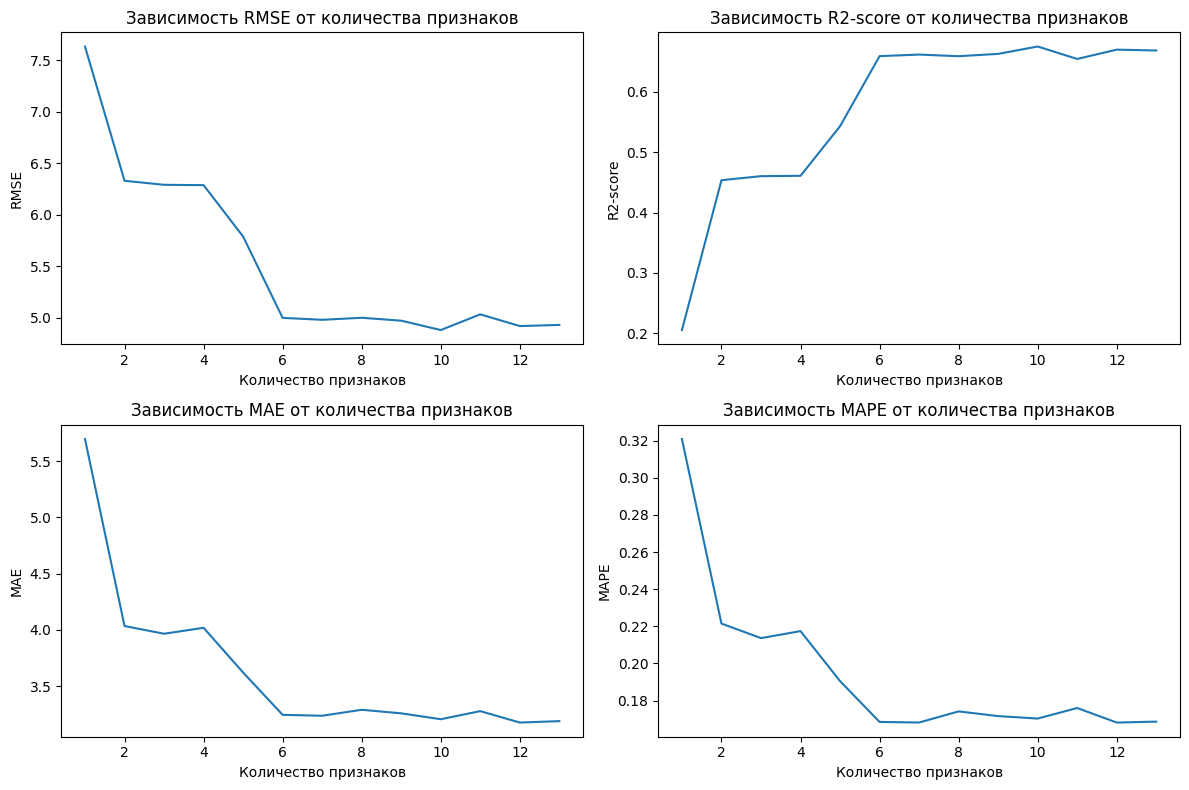

In [37]:
model = LinearRegression()
rmse_arr=np.zeros(13)
r2_arr=np.zeros(13)
mae_arr=np.zeros(13)
mape_arr=np.zeros(13)
x_arr=np.zeros(13)

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

for i in range(13):
    columns=ordered_columns[:(i+1)]
    X_train, X_test, y_train, y_test = train_test_split(X[columns], y, test_size=0.2, random_state=42)

    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)

    rmse_arr[i]=root_mean_squared_error(y_test,y_pred)
    r2_arr[i]=r2_score(y_test,y_pred)
    mae_arr[i]=mean_absolute_error(y_test,y_pred)
    mape_arr[i]=mean_absolute_percentage_error(y_test,y_pred)

    x_arr[i]=i+1


axs[0,0].plot(x_arr,rmse_arr)
axs[0,1].plot(x_arr,r2_arr)
axs[1,0].plot(x_arr,mae_arr)
axs[1,1].plot(x_arr,mape_arr)
for i in range (4):
    axs[i//2,i%2].set_xlabel('Количество признаков')

axs[0,0].set_ylabel('RMSE')
axs[0,1].set_ylabel('R2-score')
axs[1,0].set_ylabel('MAE')
axs[1,1].set_ylabel('MAPE')

axs[0,0].set_title('Зависимость RMSE от количества признаков')
axs[0,1].set_title('Зависимость R2-score от количества признаков')
axs[1,0].set_title('Зависимость MAE от количества признаков')
axs[1,1].set_title('Зависимость MAPE от количества признаков')


plt.tight_layout()
plt.show()

Вывод: в среднем увеличение количества столбцов делает только лучше

# Часть 2. Отрисовка модели с 2 признаками

In [38]:
columns=ordered_columns[:2]
columns
%matplotlib inline
#X_train, X_test, y_train, y_test = train_test_split(X[columns], y, test_size=0.2, random_state=42)
model.fit(X[columns],y)
model.coef_, model.intercept_


(array([-18.97061905,   8.15665581]), -18.20588463772901)

In [39]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X['NOX'], X['RM'], y,color='orange')

x_values=np.linspace(X['NOX'].min(), X['NOX'].max(), 10)
y_values=np.linspace(X['RM'].min(), X['RM'].max(), 10)
xx,yy=np.meshgrid(x_values,y_values)

z_values=xx*model.coef_[0]+yy*model.coef_[1]+model.intercept_

ax.plot_surface(xx, yy, z_values, alpha=0.5, color='blue')

ax.set_xlabel('Концентрация оксидов азота')
ax.set_ylabel('Количество комнат в доме')
ax.set_zlabel('Стоимость дома в 1000 долларов')

def rotate(angle):
    ax.view_init(elev=10, azim=angle)

ani = animation.FuncAnimation(fig, rotate, frames=np.arange(0, 360, 2), interval=50)
ani.save('plot.gif',writer='pillow')

plt.close(fig)


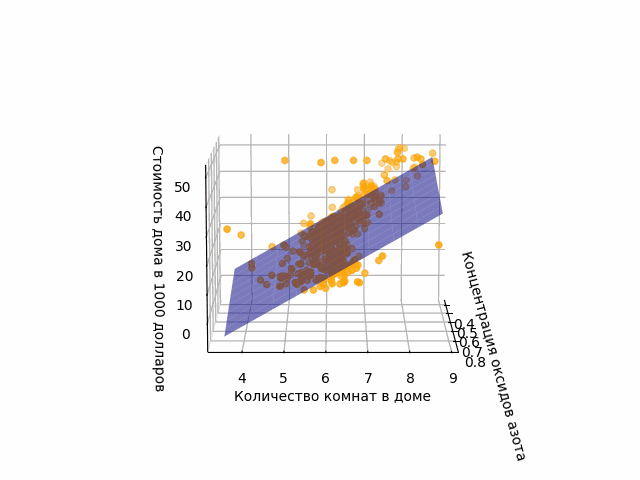

In [40]:
from IPython.display import Image
Image(filename='plot.gif')